In [302]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.dates import date2num
import numpy as np
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import os
from collections import OrderedDict


In [348]:
# read in buoy info
bys = pd.read_csv('../tabswebsite/includes/buoys.csv', index_col=0).to_dict('index')

buoys = {'BOLI': {'ll': ([-94.783, 29.342]), 'color': '#689F38', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'MIDG': {'ll': ([-94.875, 29.508]),  'color': '#FBC02D', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'FISH': {'ll': ([-94.854, 29.670]),  'color': '#F57C00', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'TRIN': {'ll': ([-94.746, 29.661]),  'color': '#FFA000', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'OLDR': {'ll': ([-94.783, 29.833]), 'color': '#D32F2F', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         '8771486': {'ll': ([bys['8771486']['lon'], bys['8771486']['lat']]),  'color': '#0097A7',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770613': {'ll': ([bys['8770613']['lon'], bys['8770613']['lat']]),  'color': '#E64A19',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity']},
         '8771013': {'ll': ([bys['8771013']['lon'], bys['8771013']['lat']]), 'color': '#AFB42B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity']},
         '8771341': {'ll': ([bys['8771341']['lon'], bys['8771341']['lat']]), 'color': '#388E3C',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8771450': {'ll': ([bys['8771450']['lon'], bys['8771450']['lat']]), 'color': '#00796B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         'B': {'ll': ([bys['B']['lon'], bys['B']['lat']]), 'color': '#303F9F',
                     'vars': ['AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity', 'Along [cm/s]', 'Across [cm/s]']},
         'g06010': {'ll': ([bys['g06010']['lon'], bys['g06010']['lat']]), 'color': '#388E3C',
                     'vars': ['Along [cm/s]', 'Across [cm/s]']},
         '42035': {'ll': ([bys['42035']['lon'], bys['42035']['lat']]), 'color': '#5D4037',
                     'vars': ['AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770808': {'ll': ([bys['8770808']['lon'], bys['8770808']['lat']]), 'color': '#512DA8',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770777': {'ll': ([bys['8770777']['lon'], bys['8770777']['lat']]), 'color': '#C2185B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770822': {'ll': ([bys['8770822']['lon'], bys['8770822']['lat']]), 'color': '#455A64',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770971': {'ll': ([bys['8770971']['lon'], bys['8770971']['lat']]), 'color': '#7B1FA2',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8771972': {'ll': ([bys['8771972']['lon'], bys['8771972']['lat']]), 'color': '#0288D1',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']}
        }


buoys_ordered = ['8770777', '8770613', 'OLDR', 'FISH', 'TRIN', 'MIDG', '8771013', 'BOLI', 'g06010', '8771341',
                '8771450', '8771486', '8771972', '8770971', '8770808', 'B', '42035', '8770822']
# buoys down main bay
buoys_main = ['8770613', 'FISH', 'TRIN', 'MIDG', '8771013', 'BOLI', 'g06010', '8771341', '8771450']

In [555]:
savename = 'data.csv'
if not os.path.exists(savename):
    
    ## TWDB ##
    # Boli can be dealt with separately
    df = pd.read_csv('twdb/Boli.csv', index_col=0, parse_dates=True)['2017-08-01':'2017-10-31'].tz_localize('UTC').tz_convert('US/Central')
    df.drop(['Datetime_(UTC).1', 'water_conductivity_mS/cm',
              'instrument_battery_voltage', 'water_specific_conductivity_mS/cm'], axis=1, inplace=True)
    df.rename(columns={'water_temp_C': 'BOLI: WaterT [deg C]',
                        'water_depth_m_nonvented': 'BOLI: Depth [m]',
                        'water_salinity_PSU': 'BOLI: Salinity'}, inplace=True)
    df = df.resample('1H', base=0).mean()
    df.index.rename('Dates [CDT]', inplace=True)
    
    names = ['FISH', 'MIDG', 'OLDR', 'TRIN']
    Files = ['_seawater_salinity', '_water_depth_nonvented', '_water_temperature']
    filenames = ['Salinity', 'Depth [m]', 'WaterT [deg C]']
    for name  in names:
        for File, filename  in zip(Files, filenames):
            # read in as UTC
            dft = pd.read_csv('twdb/' + name + File + '.csv', index_col=0,
                             parse_dates=True, comment='#', header=0, names=['dates [local]', filename])['2017-08-01':'2017-10-31'].tz_localize('UTC').tz_convert('US/Central')
            dft = dft.resample('1H', base=0).mean()
            df[name + ': ' + filename] = dft
    
    ## TABS ##
    for table in ['met', 'salt', 'ven']:
        dft = pd.read_table('buoys/tabs_B_' + table, index_col=0,
                         parse_dates=True)['2017-08-01':'2017-10-31'].tz_localize('US/Central')
        dft = dft.resample('1H', base=0).mean()
        for var in buoys['B']['vars']:
            if var in dft.columns:
                df['B: ' + var] = dft[var]
        
    
            
    ## NOS/NDBC buoys ##
    for buoy in buoys:
        if len(buoy) < 5:
            continue
        dft = pd.read_table('buoys/' + buoy, index_col=0, parse_dates=True, na_values=-999.00)['2017-08-01':'2017-10-31'].tz_localize('US/Central')
        dft = dft.resample('1H', base=0).mean()
        for var in buoys[buoy]['vars']:
            if var in dft.columns:
                df[buoy + ': ' + var] = dft[var]


    df.to_csv(savename)
    
else:
    df = pd.read_csv(savename, parse_dates=True, index_col=0)

In [729]:
df['BOLI: Water Level [m]'] = (df['BOLI: Depth [m]'] - df['BOLI: Depth [m]']['2017-08-1':'2017-8-24'].mean())

# Maps

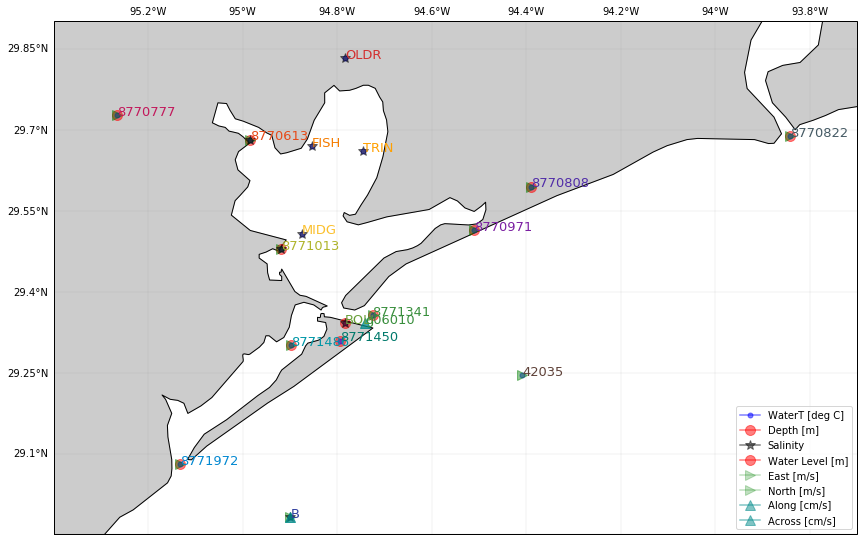

In [305]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])
pc = cartopy.crs.PlateCarree()
merc = cartopy.crs.Mercator(central_longitude=-85.0)

plots = {'Water Level [m]': {'color': 'r', 'marker': 'o', 'ms': 10, 'alpha': 0.5}, 
         'WaterT [deg C]': {'color': 'b', 'marker': '.', 'ms': 10, 'alpha': 0.5}, 
         'Depth [m]': {'color': 'r', 'marker': 'o', 'ms': 10, 'alpha': 0.5},  
         'East [m/s]': {'color': 'g', 'marker': '>', 'ms': 10, 'alpha': 0.25}, 
         'North [m/s]': {'color': 'g', 'marker': '>', 'ms': 10, 'alpha': 0.25}, 
         'Salinity': {'color': 'k', 'marker': '*', 'ms': 10, 'alpha': 0.5}, 
         'Along [cm/s]': {'color': 'darkcyan', 'marker': '^', 'ms': 10, 'alpha': 0.5},
         'Across [cm/s]': {'color': 'darkcyan', 'marker': '^', 'ms': 10, 'alpha': 0.5}}


fig = plt.figure(figsize=(12, 8))# (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-95.4, -93.7, 28.95, 29.9], pc)
# ax.set_extent([-95.1, -94.5, 29.25, 29.85], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'

# mappable = ax.contourf(lon, lat, bathy, cmap=cmo.deep, transform=pc)
# cb = fig.colorbar(mappable)

for buoy in buoys.keys():
    for var in buoys[buoy]['vars']:
        if var == 'AirT [deg C]':
            continue
        if not df['2017-08-24':'2017-09-3'][buoy + ': ' + var].isnull().all():
            ax.plot(*buoys[buoy]['ll'], **plots[var], transform=pc, label=var)
    ax.text(*buoys[buoy]['ll'], buoy, transform=pc, fontsize=13, color=buoys[buoy]['color'])

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower right')   



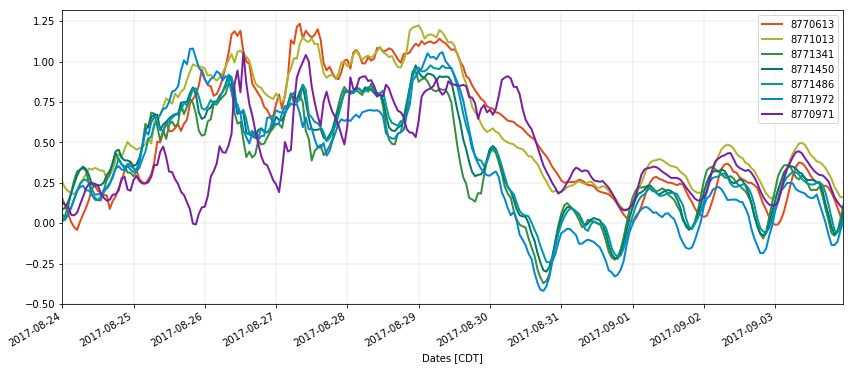

In [671]:
for buoy in buoys_ordered:
    # Exclude buoys outside the bay proper
    if buoy in ['B', '42035', '8770822', '8770777', 'OLDR', '8770808']:
        continue
#     if buoy not in ['8770613', '8771013', '8771341', '8771486', '8771450', '8770822']:
#         continue
    if 'Water Level [m]' in buoys[buoy]['vars']:
        df[buoy + ': Water Level [m]']['2017-08-24':'2017-09-3'].plot(figsize=(14,6), label=buoy, legend=True, color=buoys[buoy]['color'], lw=2)#, alpha=0.4)
# plt.gca().set_ylim(-0.5, 1.5)
plt.grid(which='major', lw=1.5, color='k', alpha=0.05)
plt.grid(which='minor', lw=1, color='k', alpha=0.05)


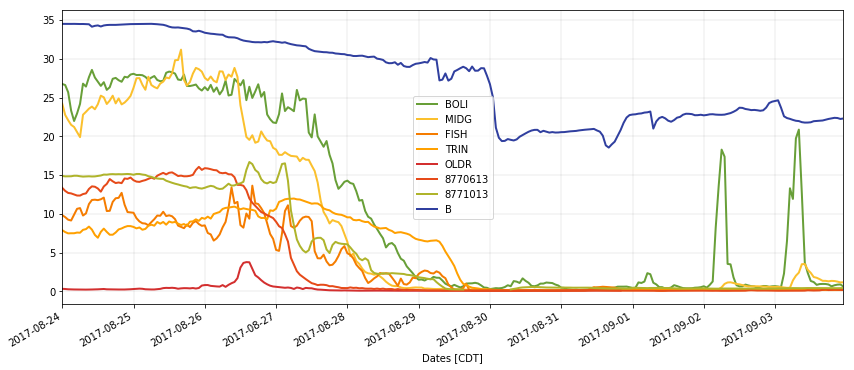

In [580]:
# Choose colors that are more distinct
for buoy in buoys.keys():
    if 'Salinity' in buoys[buoy]['vars']:
        df[buoy + ': Salinity']['2017-08-24':'2017-09-3'].plot(figsize=(14,6), label=buoy, legend=True, color=buoys[buoy]['color'], lw=2)#, alpha=0.4)

plt.grid(which='major', lw=1.5, color='k', alpha=0.05)
plt.grid(which='minor', lw=1, color='k', alpha=0.05)


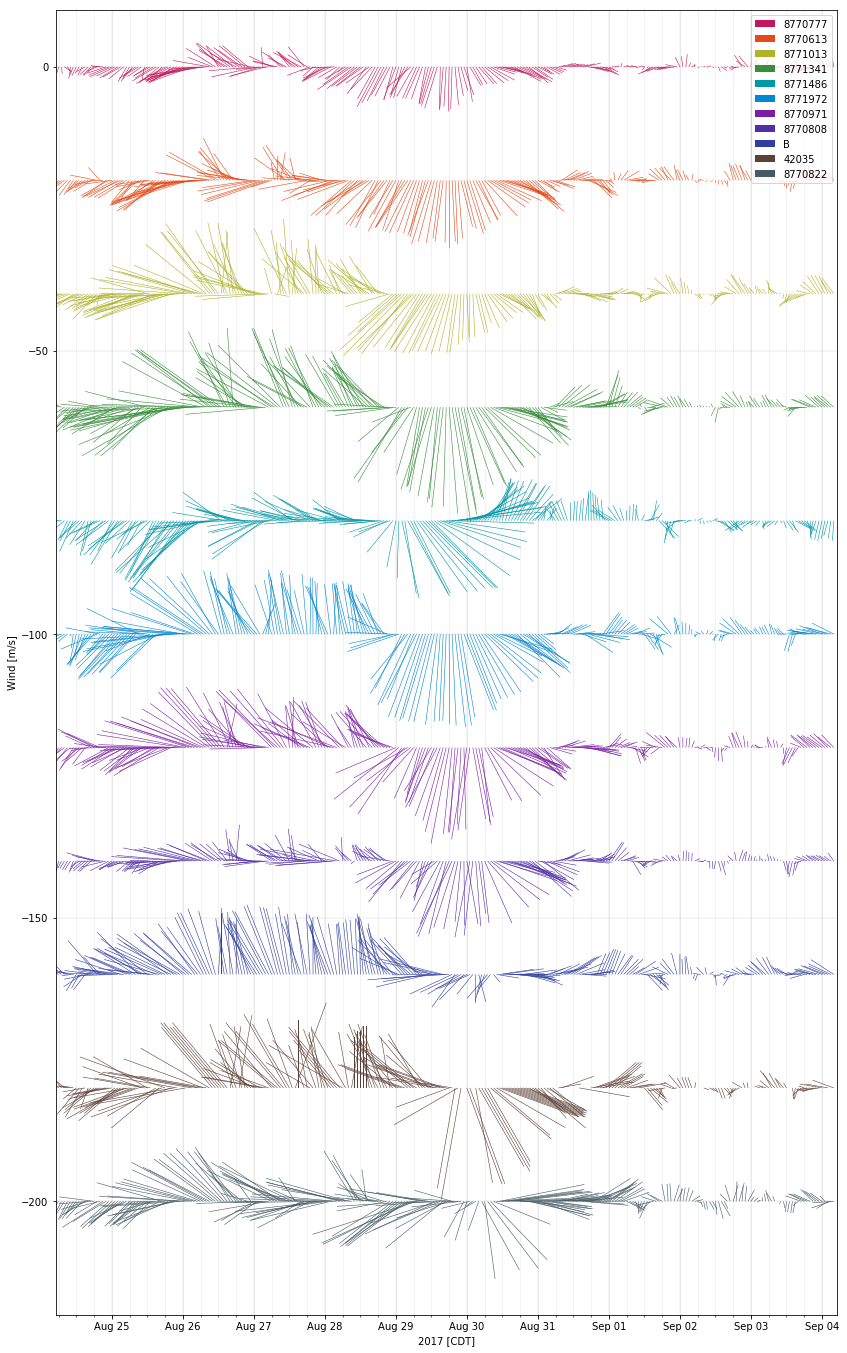

In [581]:
df['idx'] = date2num(pd.to_datetime(df.index).to_pydatetime())
ddt = 1
width=.1

fig, ax = plt.subplots(1, 1, figsize=(14,24))
ax.set_ylim(-220,10)
ax.set_xlim(df['idx'].loc['2017-08-24 00:00:00'], df['idx'].loc['2017-09-4 00:00:00'])
i = 0
for buoy in buoys_ordered:
    if 'East [m/s]' in buoys[buoy]['vars'] and not df['2017-08-24':'2017-09-3'][buoy + ': East [m/s]'].isnull().all():
        ax.quiver(df['idx'][::ddt]['2017-08-24':'2017-09-3'], np.zeros(len(df[::ddt]['2017-08-24':'2017-09-3'])) - i*20, df[::ddt]['2017-08-24':'2017-09-3'][buoy + ': East [m/s]'], df[::ddt]['2017-08-24':'2017-09-3'][buoy + ': North [m/s]'], headaxislength=0,
                  headlength=0, width=width, units='y', scale_units='y', scale=1, color=buoys[buoy]['color'], label=buoy)
        i += 1

import matplotlib as mpl
minor = mpl.dates.HourLocator(byhour=np.arange(0,24,6))
ax.xaxis.set_minor_locator(minor)
major = mpl.dates.HourLocator(byhour=np.arange(0,24,24))
ax.xaxis.set_major_locator(major)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %d'))
# if df.index[0].year != df.index[-1].year:
#     ax.text(0.98, -0.05, df.index.strftime("%Y")[0] + '-' + df.index.strftime("%Y")[-1],
#             transform=ax.transAxes, rotation=30)
# else:
#     ax.text(0.98, -0.15, df.index.strftime("%Y")[-1],
#             transform=ax.transAxes, rotation=30)
ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
ax.grid(which='minor', lw=1, color='k', alpha=0.05)

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')   

ax.set_xlabel('2017 [CDT]')
ax.set_ylabel('Wind [m/s]')


### $u_{along}$

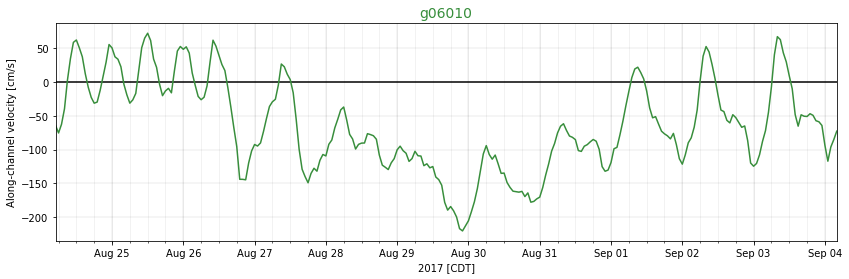

In [582]:
ax = df['2017-08-24':'2017-9-3'].plot(x='idx', y='g06010: Along [cm/s]', legend=False, figsize=(14,4), color=buoys['g06010']['color'])
ax.hlines(0, *ax.get_xlim())

minor = mpl.dates.HourLocator(byhour=np.arange(0,24,6))
ax.xaxis.set_minor_locator(minor)
major = mpl.dates.HourLocator(byhour=np.arange(0,24,24))
ax.xaxis.set_major_locator(major)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %d'))

ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
ax.grid(which='minor', lw=1, color='k', alpha=0.05)

ax.set_xlabel('2017 [CDT]')
ax.set_ylabel('Along-channel velocity [cm/s]')
ax.set_title('g06010', color=buoys['g06010']['color'], fontsize=14)

# Calculate Inflow to Galveston Bay

## 1. Using control volume

$\begin{align}
\partial V/\partial t &= Q_{in} - Q_{out} ~~~~~~~~(1) \\
\Rightarrow Q_{in}(t) &= Q_{out}(t) + \partial V/\partial t
\end{align}$

where $V(t)$ is the volume of Galveston Bay, $Q_{in}(t)$ is the water input to Galveston Bay, and $Q_{out}(t)$ is the water outflow from Galveston Bay.

Note that the sign convention of the buoy along-channel velocity is positive into the bay.

In [625]:
np.nansum(Qout['2017-08-24':'2017-09-1'])

-3776282.8593439483

In [626]:
dVdt['2017-08-24':'2017-09-1'].sum()

-19600.000000000007

### 1a. Calculate outflow 

$\begin{align}
Q_{out} &= \iint_A u_{along}(t) \, dA  \\
~ &\approx u_{along} \cdot A \\
~ &= u_{along} \cdot W \cdot D
\end{align}$

where the integral of the along-channel velocity of a cross-section of Galveston channel is approximated by the along-channel velocity at buoy `g06010` times the approximate cross-sectional area, width $W$ times depth $D$.

In [641]:
W = 1500  # 1500 is what sat image shows might be closer for where flow goes  # 2500  # meters, calculated with length tool in google earth

D = (250*22 + 325*34 + 1050*45 + 425*35 + 50*24 + 100*17 + 300*1)/2500  # feet
D /= 3.28084  # meters
Qout = df['g06010: Along [cm/s]']/100.*W*D  # m^3/s, positive into the bay

### 1b. Calculate volume of bay in time

Assuming that any change in x/y area of the bay due to flooding is limited, we have the following:

$\begin{align}
\partial V/\partial t &= \partial /\partial t \left(\iiint dxdydz\right) \\
~ &= \partial /\partial t \left(\iint \int_{z=h}^{0} dzdxdy + \iint \int_{z=0}^{\eta} dzdxdy\right) \\
~ &= \partial /\partial t \left(\iint \int_{z=h}^{0} dzdxdy\right) + \partial /\partial t \left(\iint\int_{z=0}^{\eta} dzdxdy\right) \\
~ &= \partial /\partial t \left(\iint\int_{z=0}^{\eta} dzdxdy\right) ~~~~~(2)\\
\end{align}$


In [584]:
## read in bathymetry ##

# create arrays of lon/lat
num = 10261
dd = 9.2592589999999e-005
xllcorner = -95.250046296295
yllcorner = 28.849953716305
x = np.linspace(xllcorner, xllcorner+dd*num, num)
y = np.linspace(yllcorner, yllcorner+dd*num, num)
lon, lat = np.meshgrid(x, y)

# use every fifth bathymetry point
# bathymetry was decimated on hafen and scp'ed to here
bathy = np.load('Galveston_DEM_1072/bathy_every_fifth.npz')['bathy'][::-1,:]
np.savetxt('bathy_every_fifth.txt', bathy)
lon = lon[::5, ::5]
lat = lat[::5, ::5]



In [265]:
# use previously-clicked points along coast to separate bathymetry outside galveston bay
d = np.load('../shelf_transport/calcs/coastpts.npz')

# remove lat/lon away from g bay
inds = (d['lon']>lon.min()) * (d['lon']<lon.max())
# lonpts[inds] = np.nan; latpts[inds] = np.nan
lonpts = d['lon'][inds]; latpts = d['lat'][inds]

# make path around galveston bay
lonpts = np.hstack((lonpts, lon.max(), lon.min(), lon.min()))
latpts = np.hstack((latpts, 29.8, 29.8, latpts.min()))
pts = np.vstack((lonpts, latpts)).T
from matplotlib.path import Path
path = Path(pts)

In [266]:
inds = ~path.contains_points(np.vstack((lon.flatten(), lat.flatten())).T).reshape(lon.shape)
# inds.shape
bathy[inds] = np.nan

/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


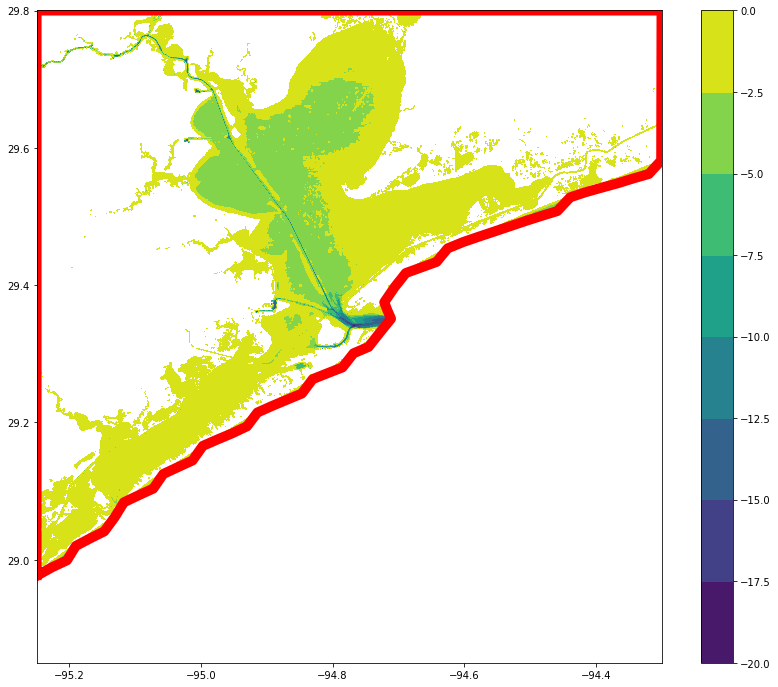

In [311]:
inds = bathy>0
bathy[inds] = np.nan
np.savez('Galveston_DEM_1072/bathy_galv.npz', bathy=bathy, lon=lon, lat=lat)

# coast
fig, ax = plt.subplots(figsize=(14,12))
mappable = ax.contourf(lon, lat, bathy); 
fig.colorbar(mappable)
ax.plot(path.vertices[:,0], path.vertices[:,1], 'r', lw=10)
# plt.xlim(lon.min(), lon.max())
# plt.ylim(lat.min(), lat.max())

In [272]:
laea = cartopy.crs.LambertAzimuthalEqualArea()
pts = laea.transform_points(pc, lon, lat)
xp = pts[:,:,0]; yp  = pts[:,:,1]
dx = np.diff(xp[0,:]).mean()
dy = np.diff(yp[:,0]).mean()

# # grid in projected space
# X, Y = np.meshgrid(np.linspace(xp.min(), xp.max(), 100), np.linspace(yp.min(), yp.max(), 110))

# surface area of Galveston Bay (assume there aren't significant new tidal plains from flooding)
# also assuming that this data is just in Galveston Bay and not too far onto the shelf...
# is True where is water
# water = bathy<0

np.nansum(~np.isnan(bathy)*dx*dy)/(1000**2)

1269.7529202644398

1270 km$^2$ surface area

* Just do main part of bay to start and use 8771013

TO DO: compare the west and east bay buoys with the main bay buoys and argue that the side bays are very disconnected.

In [800]:
np.savetxt('bathy_every_fifth.txt', bathy)

In [673]:
# CALCULATE THE BATHY OF WEST AND EAST BAYS SEPARATELY TO INCLUDE IN CALCULATION
# remove side bays
bathy = np.load('Galveston_DEM_1072/bathy_galv.npz')['bathy']
# west bay
inds = ((lat<29.4) * (lon<-94.9)) | ((lat<29.37) * (lon<-94.87)) | ((lat<29.365) * (lon<-94.825))
bathyw = bathy.copy()
bathy[inds] = np.nan  # for main bay
bathyw[~inds] = np.nan  # for west bay
np.savez('Galveston_DEM_1072/bathy_galv_west.npz', bathy=bathyw, lon=lon, lat=lat)
# east bay
inds = ((lat<29.55) * (lon>-94.75) * (lat>29.37)) | ((lat<29.8) * (lon>-94.69)) #| ((lat<29.365) * (lon<-94.825))
bathye = bathy.copy()
bathy[inds] = np.nan
bathye[~inds] = np.nan
np.savez('Galveston_DEM_1072/bathy_galv_east.npz', bathy=bathye, lon=lon, lat=lat)
np.savez('Galveston_DEM_1072/bathy_galv_main.npz', bathy=bathy, lon=lon, lat=lat)


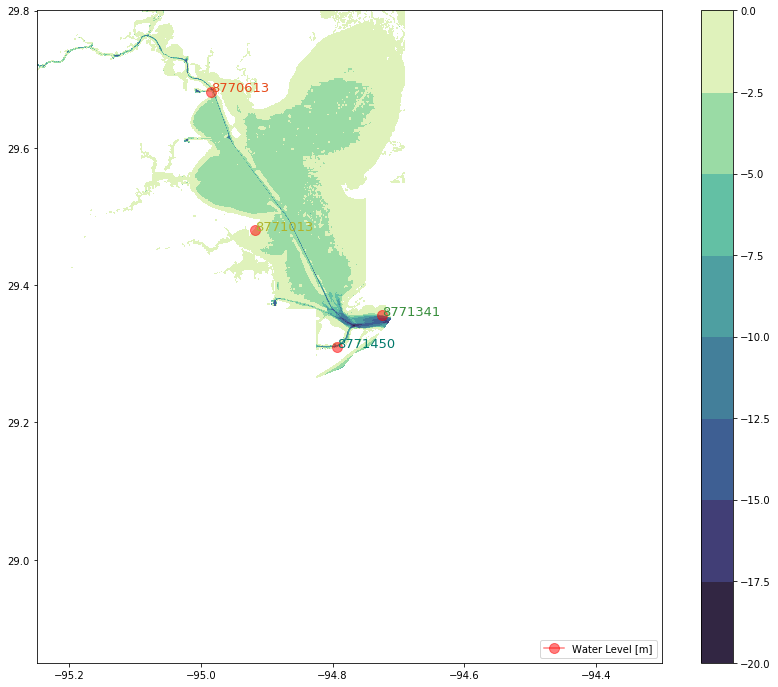

In [377]:
fig, ax = plt.subplots(figsize=(14,12))
mappable = ax.contourf(lon, lat, bathy, cmap=cmo.deep_r); 
fig.colorbar(mappable)

# buoys
for buoy in buoys_main:
    for var in buoys[buoy]['vars']:
        if 'Water Level [m]' not in var:
            continue
        if not df['2017-08-24':'2017-09-3'][buoy + ': ' + var].isnull().all():
            ax.plot(*buoys[buoy]['ll'], **plots[var], label=var)#, transform=pc)
        ax.text(*buoys[buoy]['ll'], buoy, fontsize=13, color=buoys[buoy]['color'])#, transform=pc)

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower right')   

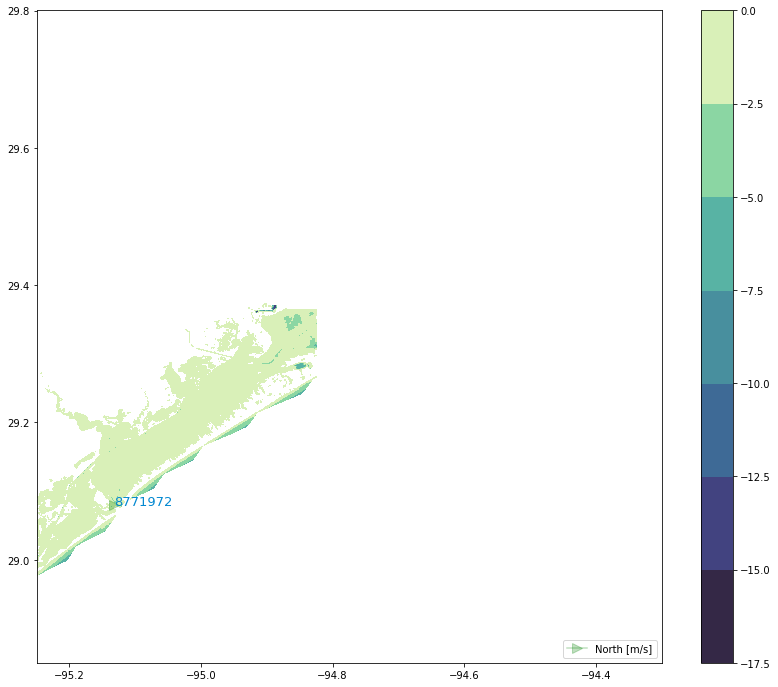

In [674]:
fig, ax = plt.subplots(figsize=(14,12))
mappable = ax.contourf(lon, lat, bathyw, cmap=cmo.deep_r); 
fig.colorbar(mappable)

buoy = '8771972'
if not df['2017-08-24':'2017-09-3'][buoy + ': ' + var].isnull().all():
    ax.plot(*buoys[buoy]['ll'], **plots[var], label=var)#, transform=pc)
ax.text(*buoys[buoy]['ll'], buoy, fontsize=13, color=buoys[buoy]['color'])#, transform=pc)

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower right')   

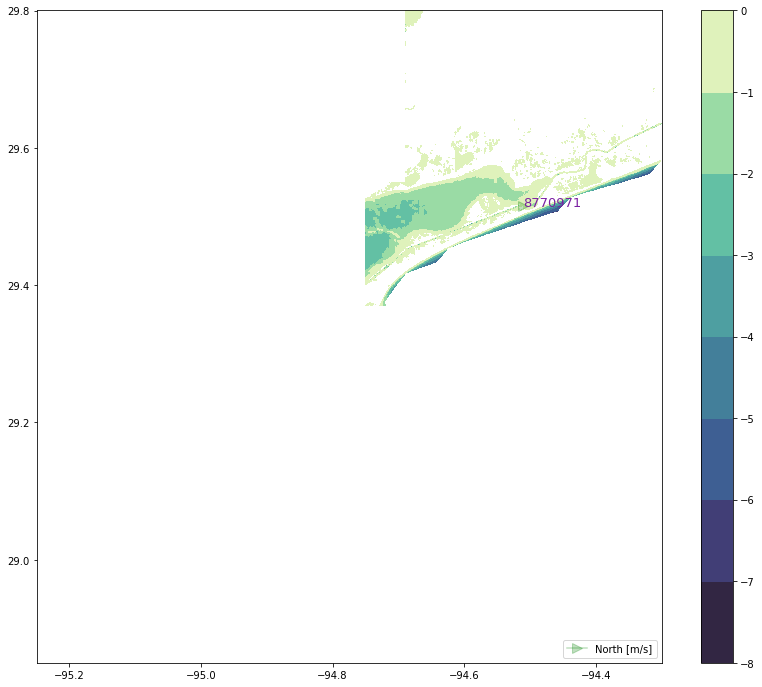

In [675]:
fig, ax = plt.subplots(figsize=(14,12))
mappable = ax.contourf(lon, lat, bathye, cmap=cmo.deep_r); 
fig.colorbar(mappable)

buoy = '8770971'
if not df['2017-08-24':'2017-09-3'][buoy + ': ' + var].isnull().all():
    ax.plot(*buoys[buoy]['ll'], **plots[var], label=var)#, transform=pc)
ax.text(*buoys[buoy]['ll'], buoy, fontsize=13, color=buoys[buoy]['color'])#, transform=pc)

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower right')   

In [339]:
# surface area of galveston minus east and west bays
np.nansum(~np.isnan(bathy)*dx*dy)/(1000**2)

723.36833746572233

Surface area of main part of Galveston Bay:

A $\approx$ 720 km$^2$

In [404]:
A = 720*1000**2  # m^2

MAYBE CHANGE DVDT TO BE CAULCATED WITH FULL BAY BUT PIECEMEAL SEA LEVEL HEIGHT

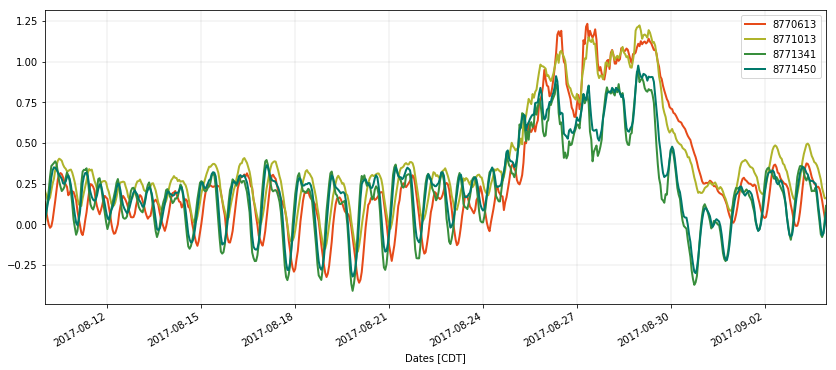

In [585]:
for buoy in buoys_main:
    if 'Water Level [m]' in buoys[buoy]['vars']:
        df[buoy + ': Water Level [m]']['2017-08-10':'2017-09-3'].plot(figsize=(14,6), label=buoy, legend=True, color=buoys[buoy]['color'], lw=2)#, alpha=0.4)
# plt.gca().set_ylim(-0.5, 1.5)
plt.grid(which='major', lw=1.5, color='k', alpha=0.05)
plt.grid(which='minor', lw=1, color='k', alpha=0.05)

# add side bays
df[': Water Level [m]']['2017-08-10':'2017-09-3'].plot(figsize=(14,6), label=buoy, legend=True, color=buoys[buoy]['color'], lw=2)#, alpha=0.4)


There is little variation between buoys 8770613 and 8771013 but a lot of variation between 8771013 and 8771341 despite the fact that both pairs of buoys are about 20km apart. This could indicate that there is a choke point at the Texas City "Y" for part of the flooding — between about August 26th and September 1st.

Assuming this (UNTIL I GET THE SALINITY DEPTH DATA), we will use the depths at buoy 8771013 to represent the entire bay (minus the small entrance part which is a small area (CAN IMPROVE LATER).

Then Equation 2 (repeated below) can be simplified:

$
\begin{align}
\partial V/\partial t &= \partial /\partial t \left(\iint\int_{z=0}^{\eta} dzdxdy\right) ~~~~~(2) \\
~ &= A \partial /\partial t \int_{z=0}^{\eta} dz \\
~ &= A \partial \eta/\partial t
\end{align}
$


Also note that the buoy data is taken from mean sea level, but the cumulative sum of the depths shows an increase in time before the hurricane (next plot). So, we first subtract out the mean from the weeks before the storm to get a better estimate (better cumulative sum in following plot).

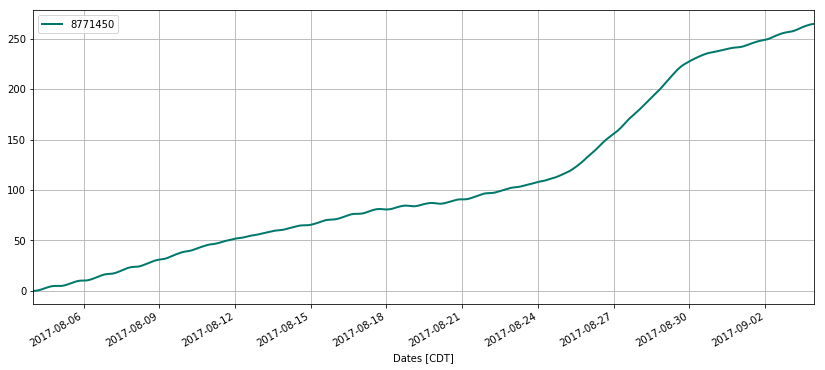

In [586]:
df['8771013: Water Level [m]']['2017-08-4':'2017-09-3'].cumsum().plot(figsize=(14,6), label=buoy, legend=True, color=buoys[buoy]['color'], lw=2, grid=True)

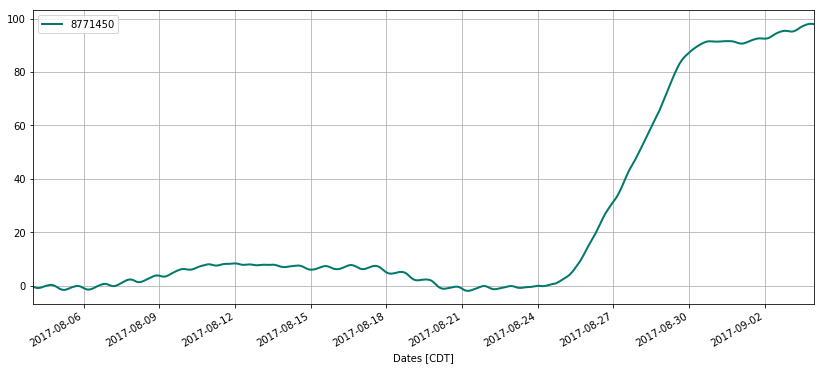

In [587]:
(df['8771013: Water Level [m]']['2017-08-4':'2017-09-3'] - df['8771013: Water Level [m]']['2017-08-4':'2017-08-23'].mean()).cumsum().plot(figsize=(14,6), label=buoy, legend=True, color=buoys[buoy]['color'], lw=2, grid=True)


In [588]:
# sea level at buoy 8771013 with mean subtracted out
eta = (df['8771013: Water Level [m]']['2017-08-4':] - df['8771013: Water Level [m]']['2017-08-4':'2017-08-23'].mean())
detadt = eta.diff()/3600.  # divide by 3600 seconds for an hour frequency
dVdt = A * detadt

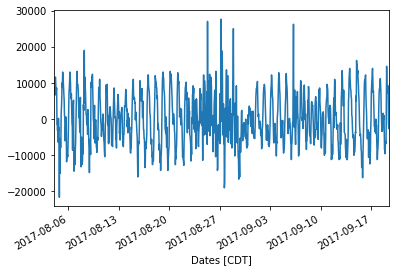

In [592]:
dVdt.plot()

In [684]:
# add in west and east bays to dVdt calculation
Aw = np.nansum(~np.isnan(bathyw)*dx*dy)
# sea level at buoy with mean subtracted out
buoy = '8771972'
etaw = (df[buoy + ': Water Level [m]']['2017-08-4':] - df[buoy + ': Water Level [m]']['2017-08-4':'2017-08-23'].mean())
detawdt = etaw.diff()/3600.  # divide by 3600 seconds for an hour frequency
dVwdt = Aw * detawdt

# add in west and east bays to dVdt calculation
Ae = np.nansum(~np.isnan(bathye)*dx*dy)
# sea level at buoy with mean subtracted out
buoy = '8770971'
etae = (df[buoy + ': Water Level [m]']['2017-08-4':] - df[buoy + ': Water Level [m]']['2017-08-4':'2017-08-23'].mean())
detaedt = etae.diff()/3600.  # divide by 3600 seconds for an hour frequency
dVedt = Ae * detaedt

In [685]:
print(A, Aw, Ae)

720000000 321171706.889 215184559.237


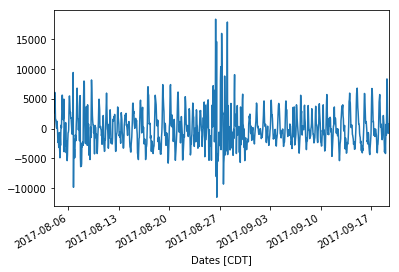

In [686]:
dVedt.plot()

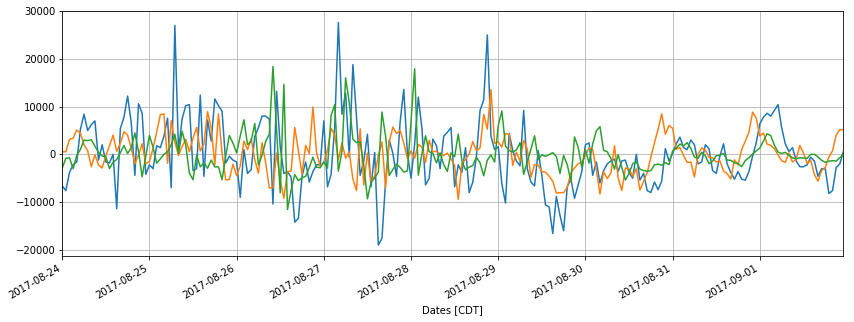

In [709]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
dVdt['2017-08-24':'2017-9-1'].plot(ax=ax)
dVwdt['2017-08-24':'2017-9-1'].plot(ax=ax)
dVedt['2017-08-24':'2017-9-1'].plot(ax=ax, grid=True)

$Q_{in}(t) = Q_{out}(t) + \partial V/\partial t$

Note that the sign convention of the buoy along-channel velocity is positive into the bay, so $Q_{out}$ should have a negative sign added to the front

In [771]:
# Qin1 = -Qout*.5 + dVdt + dVwdt + dVedt  # m^3/s
Qin1 = -Qout*.5 + dVdt  # m^3/s

COMPARE SLOPE OF QIN BEFORE STORM WITH RIVER INFLOW AT THE TIME

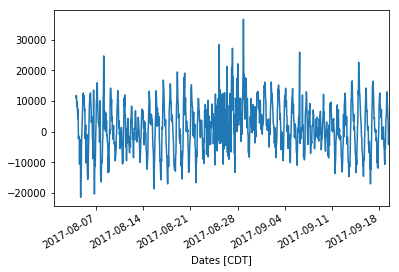

In [711]:
Qin1.plot()

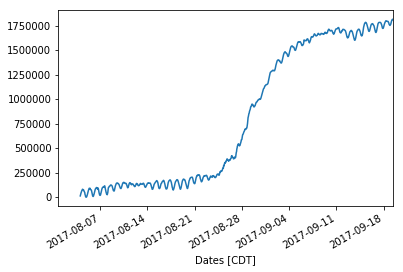

In [710]:
Qin1.cumsum().plot()

TO-DO: extract the trend of Qin before the storm from Qin to look at the longer term trend which probably includes a longer time scale floodwater input (figure above)

TO DO:  get data out farther

The volume of water input to the main part of Galveston Bay can be found by integrating $Q_{in}$ over the appropriate time period. We will take the main flooding time period as August 26 through September 1st.

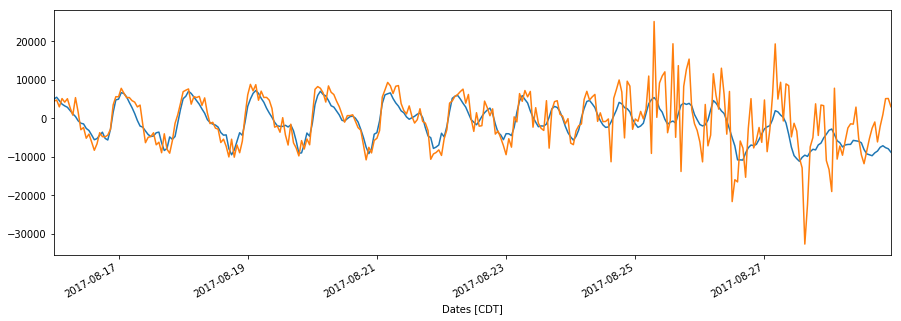

In [787]:
ax = (0.5*Qout)['2017-08-16':'2017-8-28'].plot()
(-Qout2)['2017-08-16':'2017-8-28'].plot(ax=ax, figsize=(15,5))

In [781]:
# (3600*Qin1['2017-08-26':'2017-9-1']).sum()/(1000**3)  # km^3
(3600*Qin1['2017-08-26':'2017-8-28']).sum()/(1000**3)  # km^3

1.525528904640275

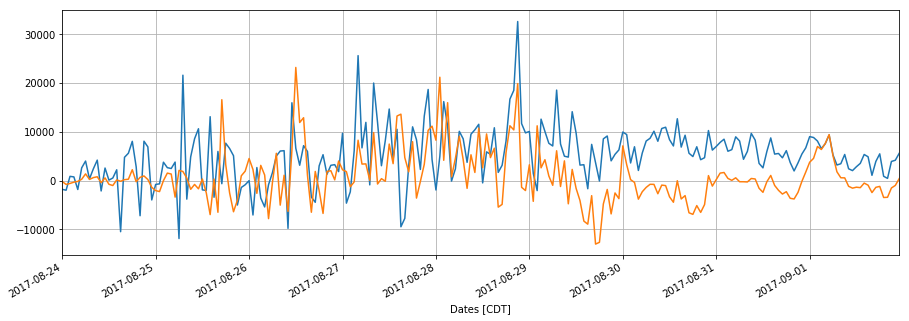

In [779]:
ax = Qin1['2017-08-24':'2017-9-1'].plot()
Qin2['2017-08-24':'2017-9-1'].plot(ax=ax, figsize=(15,5), grid=True)

## 2. Using salinity conservation

Conservation of salinity in Galveston Bay:

$
\begin{align}
\partial (S V)/\partial t &= S_{in}Q_{in} - S_{out} Q_{out} \\
\partial (S V)/\partial t &= - S_{out} Q_{out}
\end{align}
$

where the input salinity, $S_{in}$, is assumed to be fresh so $S_{in}=0$ and $S_{out}$ is the output salinity.

Combining with Equation 1,

$
\begin{align}
\partial (S V)/\partial t &= - S_{out} \left( Q_{in} - \partial V/\partial t \right) \\
\Rightarrow Q_{in} &= \partial V/\partial t - \partial (S V)/\partial t ~~\frac{1}{S_{out}}
\end{align}
$


Use MIDG to represent S(t) and use BOLI to represent S_out(t)

In [773]:
S = df['MIDG: Salinity']
# S = df['8771013: Salinity']
Sout = df['BOLI: Salinity']

dSVdt = A * (S * eta).diff()/3600.  # divide by 3600 seconds for an hour frequency
# dSVdt = A * (S * eta + S * etaw + S*etae).diff()/3600.  # divide by 3600 seconds for an hour frequency

Qin2 = dVdt - dSVdt/Sout

In [780]:
(3600*Qin2['2017-08-26':'2017-8-28']).sum()/(1000**3)  # km^3
# (3600*Qin2['2017-08-26':'2017-9-1']).sum()/(1000**3)  # km^3

1.037879307608858

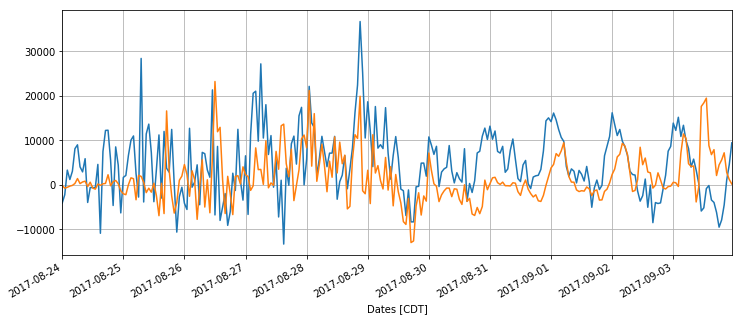

In [757]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
(Qin1['2017-08-24':'2017-9-3']).plot(ax=ax, grid=True)
(Qin2['2017-08-24':'2017-9-3']).plot(ax=ax, grid=True)

TODO: use salinity estimate more strategically in time — to estimate Qout before storm, and then only use salinity up until bay is fresh.

In [654]:
# estimate from salinity equation before substituting other equation
Qout2 = dSVdt/-Sout

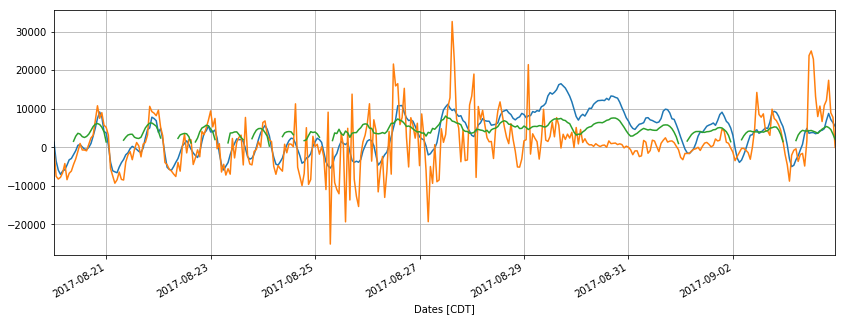

In [799]:
fig, ax = plt.subplots(1,1, figsize=(14,5))
(Qout['2017-08-20':'2017-9-3']*-.5).plot(ax=ax, grid=True)
Qout2['2017-08-20':'2017-9-3'].plot(ax=ax, grid=True)
Qout3['2017-08-20':'2017-9-3'].plot(ax=ax, grid=True)

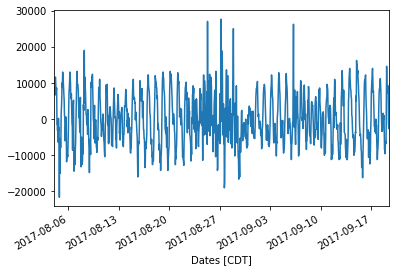

In [649]:
dVdt.plot()

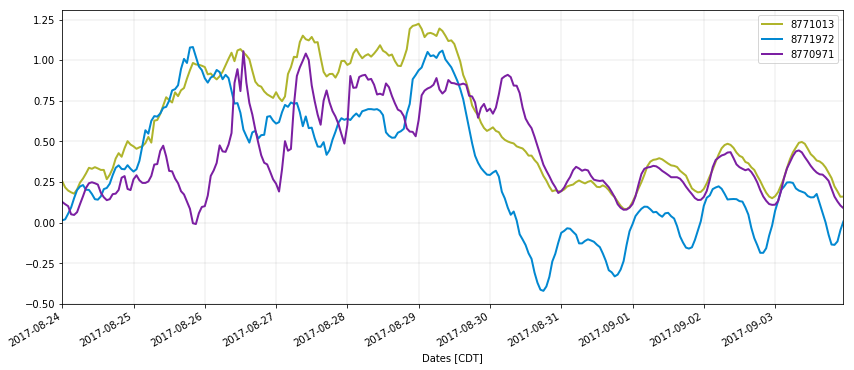

In [714]:
for buoy in ['8771013', '8771972', '8770971']:
    df[buoy + ': Water Level [m]']['2017-08-24':'2017-09-3'].plot(figsize=(14,6), label=buoy, legend=True, color=buoys[buoy]['color'], lw=2)#, alpha=0.4)
# plt.gca().set_ylim(-0.5, 1.5)
plt.grid(which='major', lw=1.5, color='k', alpha=0.05)
plt.grid(which='minor', lw=1, color='k', alpha=0.05)


## 3. Using head through Galveston channel

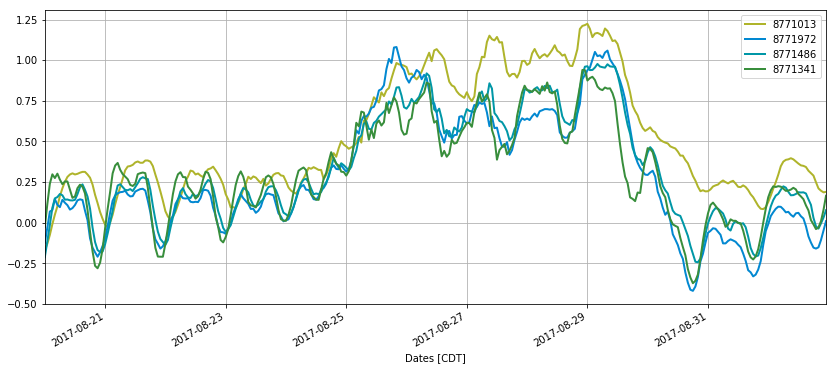

In [798]:
# df['BOLI: Water Level [m]']['2017-08-20':'2017-09-3'].plot(label='BOLI')
for buoy in ['8771013', '8771972', '8771486', '8771341']:# '8770822', '8770971']:
    df[buoy + ': Water Level [m]']['2017-08-20':'2017-09-1'].plot(figsize=(14,6), label=buoy, legend=True, color=buoys[buoy]['color'], lw=2, grid=True)
plt.legend()

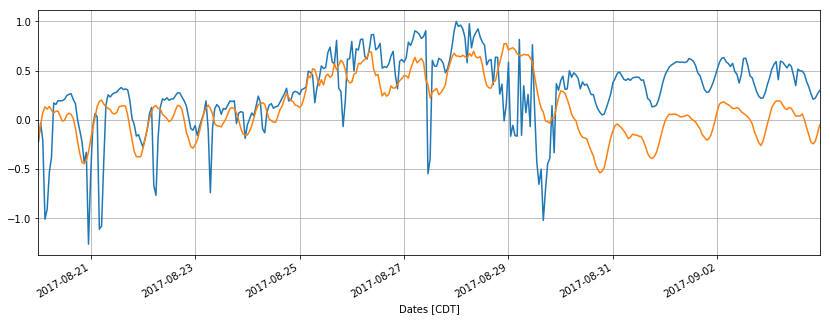

In [769]:
df['8771341: Water Level 2 [m]'] = (df['8771341: Water Level [m]'] - df['8771341: Water Level [m]']['2017-08-1':'2017-8-24'].mean())

df['BOLI: Water Level [m]']['2017-08-20':'2017-09-3'].plot(grid=True)
df['8771341: Water Level 2 [m]']['2017-08-20':'2017-09-3'].plot(grid=True, figsize=(14,5))


In [746]:
L = 4000  # meters, distance from choke pt to 8771341
n = 0.016  # roughness coefficient
S = np.sqrt((df['8771013: Water Level [m]'] - df['8771341: Water Level [m]'])/L)

Qout3 = 0.5**(2/3)/n * S * W*D

/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [747]:
0.5**(2/3)/n*W*D

589536.7266470406

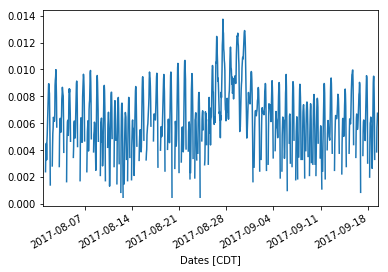

In [748]:
S.plot()

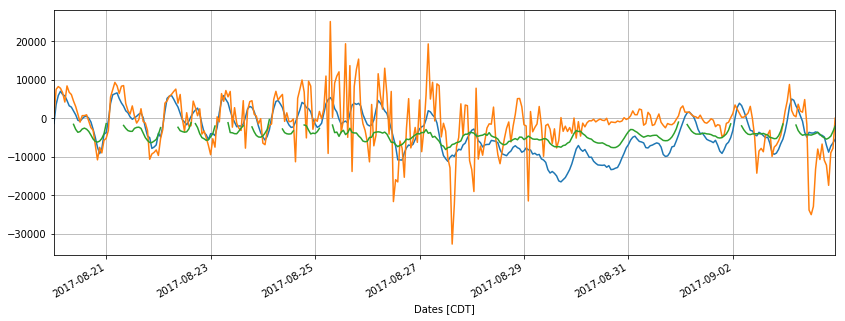

In [763]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

(.5*Qout)['2017-08-20':'2017-09-3'].plot(ax=ax)
(-Qout2)['2017-08-20':'2017-09-3'].plot(ax=ax)
(-Qout3)['2017-08-20':'2017-09-3'].plot(ax=ax, grid=True)

In [766]:
np.sqrt(9.81*1500)

121.30539971493437

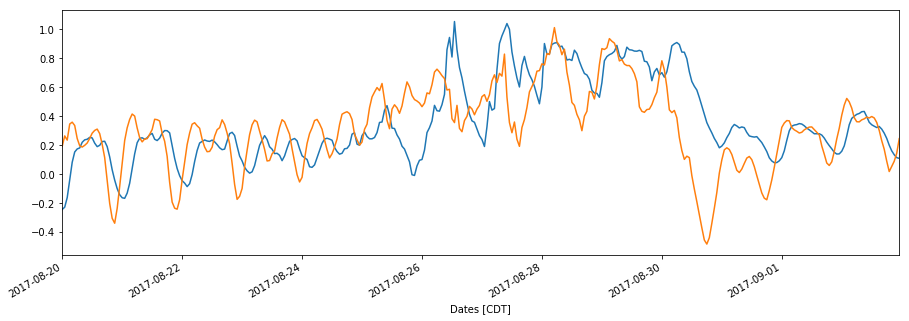

In [792]:
ax = df['8770971: Water Level [m]']['2017-08-20':'2017-9-2'].plot()
df['8770822: Water Level [m]']['2017-08-20':'2017-9-2'].plot(figsize=(15,5))

### Calculate linear trends in  $Q_{in}$

The cumulative sum, $V_{incum}$, shows a large influx due to the precipitation and flooding (figure below). However, it also shows a lower level influx trend before and after the storm. This is probably indicative of normal inflow to the bay from the watershed and Trinity river.

We detrend the cumulative sum of $Q_{in}$, $V_{incum}$, for the time period before the storm, from August 1st through August 24th, again using a linear polynomial fit for just that time period.

In [ ]:
Vincum = Qin.cumsum()*3600  # multiply by time for integration, m^3
Vincumfull1 = Qinfull1.cumsum()*3600  # multiply by time for integration, m^3
Vincumfull2 = Qinfull2.cumsum()*3600  # multiply by time for integration, m^3
ax = Vincum.plot(figsize=(15,5), grid=True)
Vincumfull1.plot()
Vincumfull2.plot()
ax.set_ylabel('Input volume [m$^3$]')

In [ ]:
# need to get datetime numbers instead of dates to use in the fit function
idx = date2num(pd.to_datetime(Vincum['2017-8-1':'2017-08-26 15:00'].index).to_pydatetime())
# remove nan's in data which mess up fit
ind = ~Vincum['2017-8-1':'2017-08-26 15:00'].isnull()
p1 = np.polyfit(idx[ind], Vincum['2017-8-1':'2017-08-26 15:00'].loc[ind], 1)  # fit a straight line (order is 1)

Remove the linear trend from the cumulative sum by subtracting the fit from the function:

In [ ]:
idx = date2num(pd.to_datetime(Vincum.index).to_pydatetime())
plt.plot(Vincum.index, p1[0]*idx + p1[1], 'r')
Vincum.plot(figsize=(15,5), grid=True)
plt.ylabel('Input volume [m$^3$]')